# Setup

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if (kaggle):
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()
    from fastbook import *
    !pip install kaggle
    
%matplotlib inline
from fastai.vision.all import *
from pathlib import Path



(#2) [Path('/root/.fastai/data/CUB_200_2011/attributes.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011')]

# Exploration

In [7]:
DATA = untar_data(URLs.CUB_200_2011)
DATA.ls()


(#2) [Path('/root/.fastai/data/CUB_200_2011/attributes.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011')]

Two main folders

In [10]:
open(DATA/'/root/.fastai/data/CUB_200_2011/attributes.txt').read()

'1 has_bill_shape::curved_(up_or_down)\n2 has_bill_shape::dagger\n3 has_bill_shape::hooked\n4 has_bill_shape::needle\n5 has_bill_shape::hooked_seabird\n6 has_bill_shape::spatulate\n7 has_bill_shape::all-purpose\n8 has_bill_shape::cone\n9 has_bill_shape::specialized\n10 has_wing_color::blue\n11 has_wing_color::brown\n12 has_wing_color::iridescent\n13 has_wing_color::purple\n14 has_wing_color::rufous\n15 has_wing_color::grey\n16 has_wing_color::yellow\n17 has_wing_color::olive\n18 has_wing_color::green\n19 has_wing_color::pink\n20 has_wing_color::orange\n21 has_wing_color::black\n22 has_wing_color::white\n23 has_wing_color::red\n24 has_wing_color::buff\n25 has_upperparts_color::blue\n26 has_upperparts_color::brown\n27 has_upperparts_color::iridescent\n28 has_upperparts_color::purple\n29 has_upperparts_color::rufous\n30 has_upperparts_color::grey\n31 has_upperparts_color::yellow\n32 has_upperparts_color::olive\n33 has_upperparts_color::green\n34 has_upperparts_color::pink\n35 has_upperpar

Detailing if a numerated(assuming pictures) contains certain attribute

In [8]:
(DATA/'/root/.fastai/data/CUB_200_2011/CUB_200_2011').ls()

(#9) [Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt')]

In [17]:
open(DATA/'/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt').read()

'1 001.Black_footed_Albatross\n2 002.Laysan_Albatross\n3 003.Sooty_Albatross\n4 004.Groove_billed_Ani\n5 005.Crested_Auklet\n6 006.Least_Auklet\n7 007.Parakeet_Auklet\n8 008.Rhinoceros_Auklet\n9 009.Brewer_Blackbird\n10 010.Red_winged_Blackbird\n11 011.Rusty_Blackbird\n12 012.Yellow_headed_Blackbird\n13 013.Bobolink\n14 014.Indigo_Bunting\n15 015.Lazuli_Bunting\n16 016.Painted_Bunting\n17 017.Cardinal\n18 018.Spotted_Catbird\n19 019.Gray_Catbird\n20 020.Yellow_breasted_Chat\n21 021.Eastern_Towhee\n22 022.Chuck_will_Widow\n23 023.Brandt_Cormorant\n24 024.Red_faced_Cormorant\n25 025.Pelagic_Cormorant\n26 026.Bronzed_Cowbird\n27 027.Shiny_Cowbird\n28 028.Brown_Creeper\n29 029.American_Crow\n30 030.Fish_Crow\n31 031.Black_billed_Cuckoo\n32 032.Mangrove_Cuckoo\n33 033.Yellow_billed_Cuckoo\n34 034.Gray_crowned_Rosy_Finch\n35 035.Purple_Finch\n36 036.Northern_Flicker\n37 037.Acadian_Flycatcher\n38 038.Great_Crested_Flycatcher\n39 039.Least_Flycatcher\n40 040.Olive_sided_Flycatcher\n41 041.Sci

200 different classes of birds

In [11]:
(DATA/'/root/.fastai/data/CUB_200_2011/CUB_200_2011/images').ls()

(#200) [Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/074.Florida_Jay'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/107.Common_Raven'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/138.Tree_Swallow'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/102.Western_Wood_Pewee'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/160.Black_throated_Blue_Warbler'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/125.Lincoln_Sparrow'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/172.Nashville_Warbler'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/155.Warbling_Vireo')...]

Seems each folder contains pictures of the spesific bird. Checking out Gray Kingbird

In [12]:
path = DATA/'/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'
(path/'078.Gray_Kingbird').ls()

(#59) [Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0026_70089.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0032_70111.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0050_70056.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0076_70070.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0013_70135.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0054_70264.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0044_70322.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0071_70100.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0045_70256.jpg'),Path('/root/.fastai/data/CUB_2

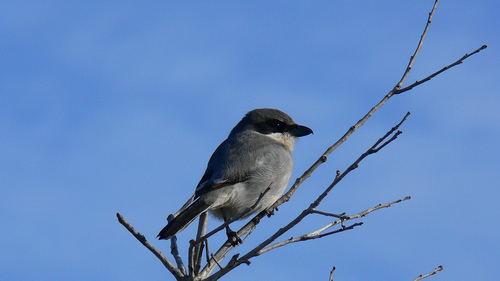

(281, 500)
########################################


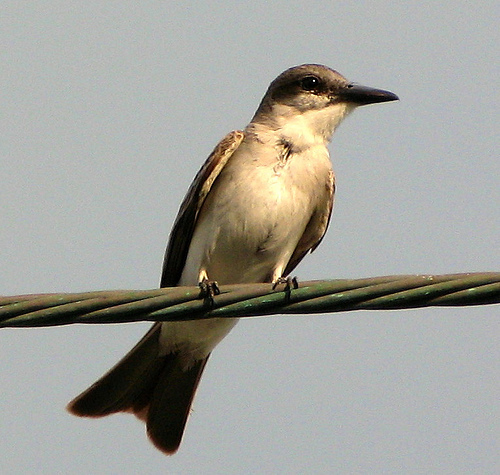

(475, 500)
########################################


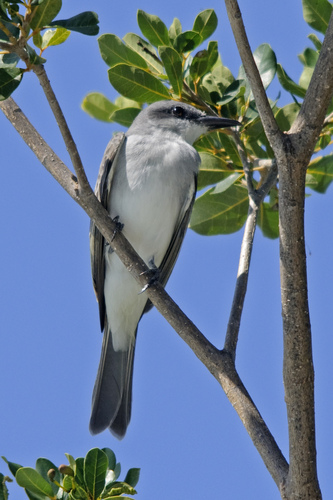

(500, 333)
########################################


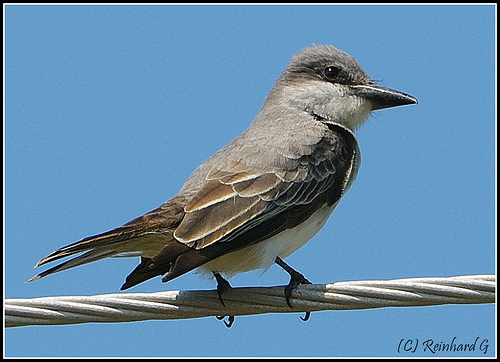

(362, 500)
########################################


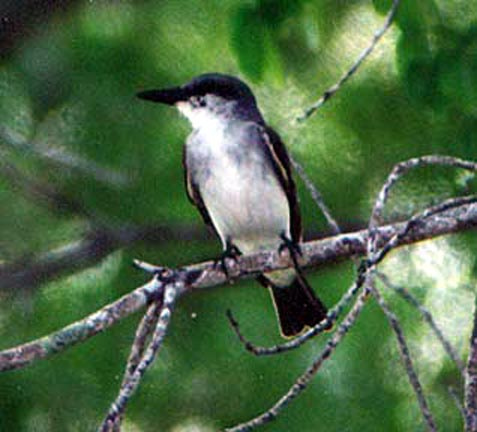

(432, 477)
########################################


In [16]:
for img in (path/'078.Gray_Kingbird').ls()[:5]:
    img = load_image(img)
    display(img)
    print(img.shape)
    print("#"*40)

Wide range in image size, all have different backrounds

In [19]:
from pathlib import PurePath

In [20]:
def get_class_distribution(path):
    classes = [PurePath(c).parts[-1] for c in path.glob('*')]
    nb_per_class = {c:len(list((path/c).iterdir())) for c in classes}
    
    print(f"There are {len(classes)} classes in the data set")
    
    return nb_per_class

In [22]:
nb_pr_bird = get_class_distribution(path)

There are 200 classes in the data set


In [23]:
nb_pr_bird

{'078.Gray_Kingbird': 59,
 '074.Florida_Jay': 60,
 '051.Horned_Grebe': 60,
 '107.Common_Raven': 59,
 '138.Tree_Swallow': 60,
 '102.Western_Wood_Pewee': 60,
 '160.Black_throated_Blue_Warbler': 59,
 '125.Lincoln_Sparrow': 59,
 '172.Nashville_Warbler': 60,
 '155.Warbling_Vireo': 60,
 '139.Scarlet_Tanager': 60,
 '195.Carolina_Wren': 60,
 '141.Artic_Tern': 58,
 '048.European_Goldfinch': 60,
 '029.American_Crow': 60,
 '101.White_Pelican': 50,
 '045.Northern_Fulmar': 60,
 '103.Sayornis': 60,
 '115.Brewer_Sparrow': 59,
 '093.Clark_Nutcracker': 60,
 '084.Red_legged_Kittiwake': 53,
 '088.Western_Meadowlark': 60,
 '025.Pelagic_Cormorant': 60,
 '169.Magnolia_Warbler': 59,
 '037.Acadian_Flycatcher': 59,
 '072.Pomarine_Jaeger': 60,
 '170.Mourning_Warbler': 60,
 '184.Louisiana_Waterthrush': 60,
 '196.House_Wren': 59,
 '136.Barn_Swallow': 60,
 '128.Seaside_Sparrow': 60,
 '060.Glaucous_winged_Gull': 59,
 '089.Hooded_Merganser': 60,
 '144.Common_Tern': 60,
 '168.Kentucky_Warbler': 59,
 '091.Mockingbird'

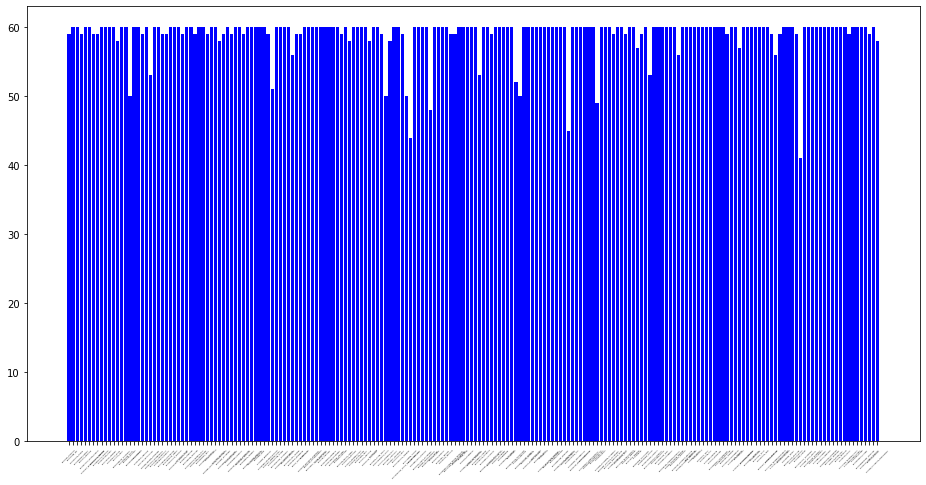

In [25]:
plt.figure(figsize=(16,8))
plt.bar(nb_pr_bird.keys(), nb_pr_bird.values(), color='b')
plt.xticks(rotation=45, fontsize=2)
plt.show()

Most classes contains around 60 pictures. Lowest amount of pictures seems to be 40

Will need to resize before training, so all the same size